# Welcome to your Jupyter IPython Notebook

Jupyter IPython Notebooks allow you to interactively run commands written in Python and inspect their output.  There are also libraries available that allow you to make graphs directly in the notebook.  This is a very convenient way to explore and analyze data.

In this tutorial, you will execute each cell (box) separately.  You can do this by clicking on the cell with the mouse and then pressing Shift+Enter.  This will run the code in the cell, and print any output you've requested.

You can execute cells out-of-order, but it's a good practice to work in order.

You can edit a cell by clicking in it and then editing the text.

If you get an error when you execute a cell, you can simply re-execute that cell after fixing the code; you don't need to re-run all the cells in the notebook from the beginning.

If you want to "comment" out a line of text (so that it will not be interpreted as a line of code and executed when you run the cell), you can do that using the # sign.

All the commands you execute in the notebook will be remembered, in the sense that if you import a library of functions or read some data into a variable in one cell, it will still be available when you execute the next cell.  If you want to start over, you can go to the "Kernel" menu at the top of the notebook and click "Restart".  This will clear everything that you've executed from the computer's memory, but it will leave all of the code you've written just as it is.

This cell was written by selecting "Markdown" from the drop-down menu above (which by default says "Code").  The notebook then understands that a Markdown cell contains comments and not code, and running this cell with Shift+Enter simply formats the text.

## What data will we use?

We will be using the Pima Indians Diabetes Database, a publicly-available data set, and building a model to predict whether a patient will get diabetes based on several measurements of each patient. The dataset is described here:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

Each row represents one patient, and the columns are:

- Pregnancies: Number of times pregnant

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- BloodPressure: Diastolic blood pressure (mm Hg)

- SkinThickness: Triceps skin fold thickness (mm)

- Insulin: 2-Hour serum insulin (mu U/ml)

- BMI: Body mass index (weight in kg/(height in m)^2)

- DiabetesPedigreeFunction: Diabetes pedigree function

- Age: Age (years)

- Outcome: Class variable (0 or 1)

## Read in the data

We will use the pandas library to work with our data.  pandas defines a format for storing the data called a dataframe, as well as many functions for working with the dataframes.  pandas dataframes can also be used with many other useful Python packages.

In [85]:
# import the pandas library for working with dataframes
import pandas as pd

In [99]:
# read the csv-formatted data file into a pandas dataframe
df=pd.read_csv('Datasets/diabetes.csv')
# get shape of data frame
print('Shape (n_rows,n_columns) of dataframe:',df.shape)
# print top 5 rows of data frame
df.head()

Shape (n_rows,n_columns) of dataframe: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspect the data using some pandas commands

### Sub-select one or more columns as a dataframe and show only the top 5 rows


In [23]:
df[['Outcome','Pregnancies','Insulin']].head()

,Outcome,Pregnancies,Insulin
0,1,6,0
1,0,1,0
2,1,8,0
3,0,1,94
4,1,0,168


### Select rows where a condition is true, and find out how many rows are in the resulting dataframe

In [25]:
print(df[df.BMI>30].shape) # the first element is the number of rows, the second element is the number of columns
print('The number of rows where BMI>30 = ',df[df.BMI>30].shape[0]) # the first element is labeled 0, the second element is labeled 1

(465, 9)
The number of rows where BMI>30 =  465


### Select rows where BMI>30,
### select the columns Outcome, BMI, and Age, 
### and show only the top 5 rows of the resulting dataframe (using the .head() command)

In [26]:
df[df.BMI>30][['Outcome','BMI','Age']].head()

,Outcome,BMI,Age
0,1,33.6,50
4,1,43.1,33
6,1,31.0,26
7,0,35.3,29
8,1,30.5,53


### Select rows where Outcome is 1 and Preganancies>0,
### select the columns Glucose and BloodPressure, 
### and show only the top 3 rows of the resulting dataframe (using the .head(nrows) command)

In [27]:
df[(df.Outcome==1)&(df.Pregnancies>0)][['Glucose','BloodPressure']].head(3)

,Glucose,BloodPressure
0,148,72
2,183,64
6,78,50


### EXERCISE: 

How many patients in the study have Outcome is 1 and BloodPressure greater than 70?  

Fill in the code below where it says NONE.

In [28]:
df[NONE].NONE

NameError: name 'NONE' is not defined

### Does the data have any missing values?

In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Get a list of columns names

In [30]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Get the column data types

In [31]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Look at some summary statistics of our data frame

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Notice that the "count" of values for each column is the same, and the same as the number of rows in the data frame.  That means that there are no missing (NULL) values.

### How many of each type of diagnosis are there?

In [33]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### What is the mean of "SkinThickness" where the Outcome is 1?

In [34]:
df[df.Outcome==0].SkinThickness.mean()

19.664000000000001

### EXERCISE: what is the maximum of "BMI" where the outcome is 0? 

In [ ]:
# use the function .max()


## Visualize the data: make scatter plots in 2 variables

In [36]:
# get a plotting library
import matplotlib.pyplot as plt
# make it interactive in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0,0.5,'BloodPressure')

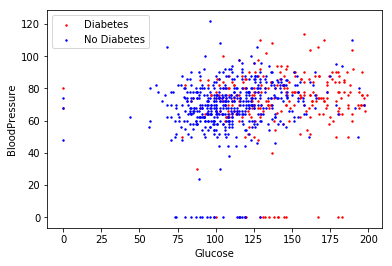

In [37]:
# plot Glucose vs BloodPressure and color points according to Outcome
plt.figure()
plt.scatter(df[df.Outcome==1].Glucose,df[df.Outcome==1].BloodPressure,label='Diabetes',color='r',s=2)
plt.scatter(df[df.Outcome==0].Glucose,df[df.Outcome==0].BloodPressure,label='No Diabetes',color='b',s=2)
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

Notice first that already you can see a trend that higher glucose is associated with diabetes (Outcome=1, red points), while lower glucose is associated with no diabetes (Outcome=0, blue points).

Notice also that there's a set of points with value 0 for Glucose, and another set with 0 for BloodPressure.  This doesn't make sense physically.  It looks like this data was filled with 0 when the value should have been NULL.  Let's check how many zeros appear in each column.

In [38]:
for c in df.columns:
    print('For column',c,' there are',df[df[c]==0][c].count(),'zero values.')


For column Pregnancies  there are 111 zero values.
For column Glucose  there are 5 zero values.
For column BloodPressure  there are 35 zero values.
For column SkinThickness  there are 227 zero values.
For column Insulin  there are 374 zero values.
For column BMI  there are 11 zero values.
For column DiabetesPedigreeFunction  there are 0 zero values.
For column Age  there are 0 zero values.
For column Outcome  there are 500 zero values.


For some of these columns, zero makes sense, like for Pregnancies and Outcome.  But for some of the others, like BloodPressure or BMI, zero definitely doesn't make sense.  Let's have a closer look at the data by making a histogram of the value of the data for each column. 

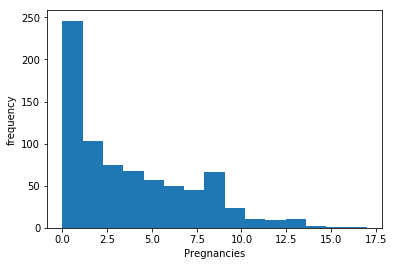

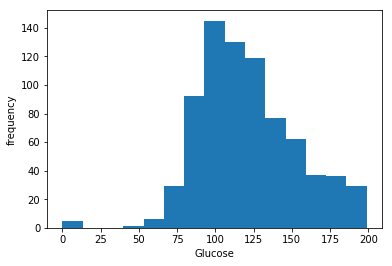

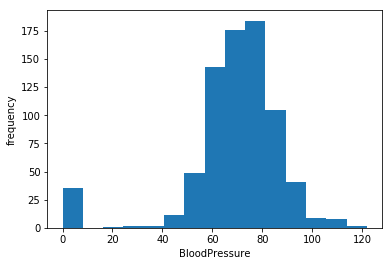

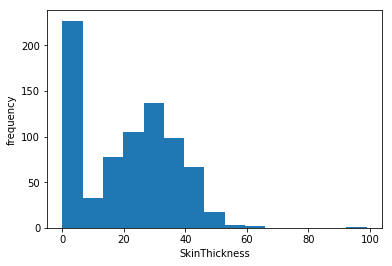

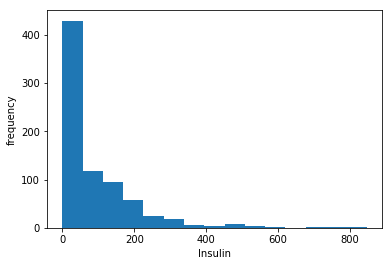

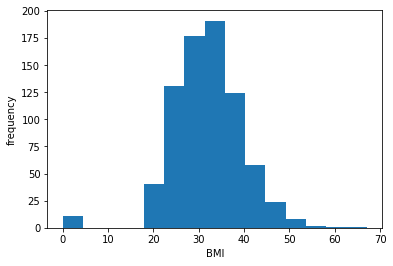

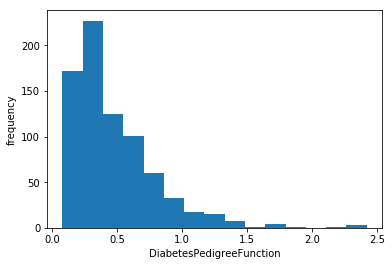

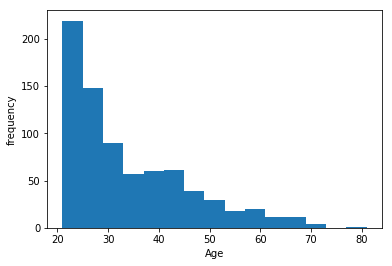

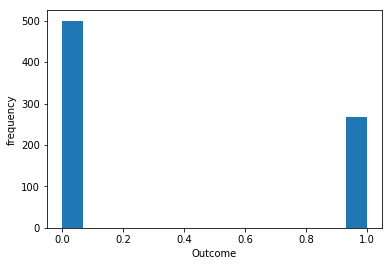

In [39]:
for c in df.columns:
    plt.figure()
    plt.hist(df[c],bins=15)
    plt.xlabel(c)
    plt.ylabel('frequency')
    plt.show()

From these histograms it seems that many of the zero values are indeed likely missing data which should have been labeled NULL, and will need to be considered before we train a model to classify the data.  

Also, if we go two cells back to where we printed the number of zeros in each column, we can also see that the column Insulin has 374 values (out of 768 rows total), almost 50% of the values, as zero.

When we're ready to build a model, we will first drop (delete) the insulin column since so many of the values are missing.  Then we will impute (fill in) the zeros in the columns where zero doesn't make sense.  We will make the choice to use the mean (average) of the non-zero values in each column to impute the values that are zero. 


### EXERCISE: inspect the data yourself by making scatter plots of different columns

### EXERCISE: find one feature column that does a pretty good job splitting the data on Outcome (the "target" or "label" column).  At which value would you split that feature column?

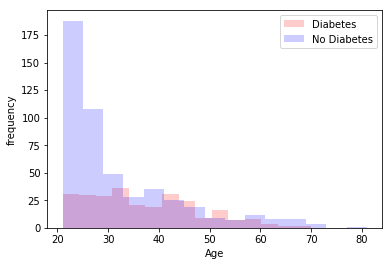

In [40]:
# example: plot histograms of Age for Outcome=1 and Outcome=0.
plt.figure()
plt.hist(df[df.Outcome==1]['Age'],bins=15,label='Diabetes',color='r',alpha=0.2)
plt.hist(df[df.Outcome==0]['Age'],bins=15,label='No Diabetes',color='b',alpha=0.2)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [ ]:
# choose a feature column, plot the histogram, and decide on a split value


### EXERCISE: how accurate is your classifier using just 1 split?

In [41]:
# example
# create a new column in the data frame with the predicted outcome based on your split (here, Age<30 means outcome=0, otherwise outcome=1)
df['PredictedOutcome']=np.where(df.Age<30,0,1) # np.where(condition, value if true, value if false)
# calculate accuracy
N_correct=df[df.PredictedOutcome==df.Outcome].shape[0]
N_total=df.shape[0]
accuracy=N_correct/N_total
print('number of correct examples =',N_correct)
print('number of examples in total =',N_total)
print('accuracy =',accuracy)

number of correct examples = 496
number of examples in total = 768
accuracy = 0.6458333333333334


We will discuss different ways of measuring the quality of a classifier in the next section.

In [42]:
# now check the accuracy of your column and split
# create a new column in the data frame with the predicted outcome based on your split
# replace "NONE" with your code
df['PredictedOutcome']=np.where(df.NONE<NONE,0,1) # np.where(condition, value if true, value if false)
# calculate accuracy
N_correct=df[df.PredictedOutcome==df.Outcome].shape[0]
N_total=df.shape[0]
accuracy=N_correct/N_total
print('number of correct examples =',N_correct)
print('number of examples in total =',N_total)
print('accuracy =',accuracy)

AttributeError: 'DataFrame' object has no attribute 'NONE'

### Splitting data into TRAIN/TEST

In [100]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state = 0)

train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.00000,537.000000,537.000000
mean,3.854749,121.543762,69.666667,21.031657,84.901304,32.255121,0.47132,33.670391,0.361266
std,3.405075,32.242413,19.464823,16.030548,118.601111,8.034497,0.33441,12.003471,0.480815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.08400,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.24000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,24.000000,45.000000,32.400000,0.37800,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,135.000000,36.800000,0.61300,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.42000,81.000000,1.000000


### CODE FOR DROPPING/IMPUTING DATA AFTER TRAIN/TEST SPLIT

In [101]:
train.drop('Insulin',axis=1,inplace=True)
test.drop('Insulin',axis=1,inplace=True) # axis=1 means drop the column, not the row
# check that Insulin is no longer in the list of columns
train.columns

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [102]:
# numpy provides many useful functions, including allowing us to create new columns in our dataframe based on a condition
import numpy as np

def imputeColumns(dataset):
    # create a list of columns that we will impute with the average non-zero value in each column
    columnsToImpute=['Glucose', 'BloodPressure', 'SkinThickness','BMI']

    for c in columnsToImpute:
        avgOfCol=dataset[dataset[c]>0][[c]].mean()
        dataset[c+'_imputed']=np.where(dataset[[c]]!=0,dataset[[c]],avgOfCol)

imputeColumns(train)
imputeColumns(test)
# check that we've imputed the 0 values  
train[train.Glucose==0][['Glucose','Glucose_imputed']].head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Glucose,Glucose_imputed
342,0,122.45591
502,0,122.45591
349,0,122.45591
182,0,122.45591


### Extracting input features and output feature

In [103]:
X_train = train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']]
Y_train = train[['Outcome']]
X_test = test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y_test = test[['Outcome']]

# Building Decision Trees for Classification

We are going to discuss the process of building a decision tree classifier for the diabetes problem. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

We are building a model that is going to make predictions, so we need to find a way to evaluate the quality of these predictions in order to trust them. Since predictions by definition is for some unseen input, we cannot depend on the data that we used to create the model. We first need to divide the dataset into two non-intersecting parts: training data that is going to be used for building the model and test data for evaluating the model predictions.

In [104]:
Y_train.describe()

,Outcome
count,537.000000
mean,0.361266
std,0.480815
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [105]:
Y_test.describe()

,Outcome
count,231.000000
mean,0.320346
std,0.467623
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


We are ready now to build our first classifier. We use the training data to build our decision tree model. Then we are going to evaluate its score using the test set. 

In [106]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state = 0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, Y_train)

# Evaluate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, Y_test)

0.74025974025974028

#### Congratualtions! We got around 74% accuracy on our first classifier. Let us first visualize the decision tree built.

In [107]:
from sklearn import tree

dot_file = tree.export_graphviz(decision_tree_classifier, out_file='tree.dot', 
                                feature_names = list(X_train),
                                class_names = ['healthy', 'ill']) 


We noticed that the decision tree built is very deep and too complicated. This indicates that the model 
will not be able to generalize well. This phenomenon is called overfitting. Mainly, the model memorizes
the training data and would have high accuracy on the training data but will perform badly on unseen ones.

In [108]:
print("Accuracy on training set: {:.3f}".format(decision_tree_classifier.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree_classifier.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.740


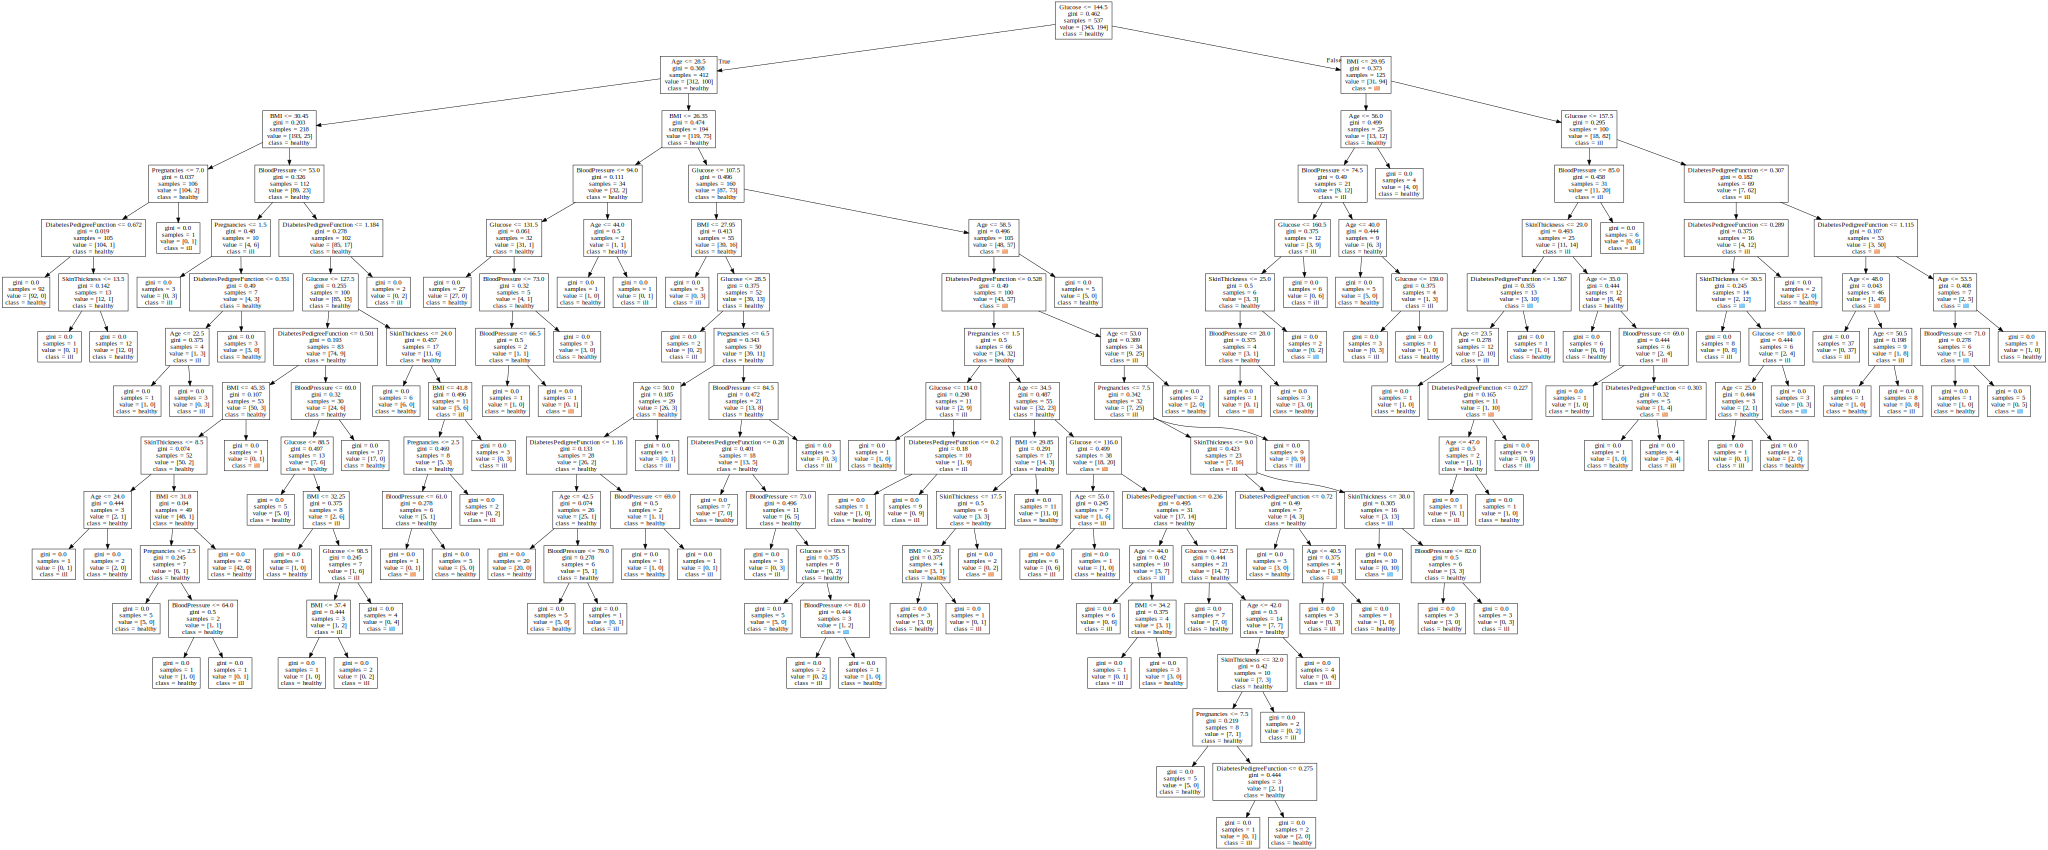

In [109]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

To avoid overfitting, we can attempt to reduce the complexity of the model. This can be done during building the model
(pre-pruning) or after building it (post-pruning). Sklearn provide built-in functions to control pre-pruning like
limiting the depth of the model. 

In [131]:
decision_tree_pruned = DecisionTreeClassifier(random_state = 0, max_depth = 1)

decision_tree_pruned.fit(X_train, Y_train)
decision_tree_pruned.score(X_test, Y_test)

0.73160173160173159

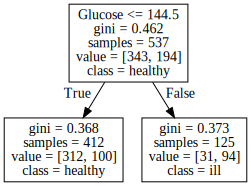

In [132]:
pre_pruned_dot_file = tree.export_graphviz(decision_tree_pruned, out_file='pruned_tree.dot', 
                                feature_names = list(X_test),
                                class_names = ['healthy', 'ill'])
with open("pruned_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

What other parameters can be used for pre-pruning? Experiment with different parameters and check how the results vary.

hint: consult http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html